In [ ]:
!pip install tensorflow split-folders matplotlib

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import splitfolders
from tensorflow.keras.preprocessing import image
from google.colab import files

In [ ]:
!wget -O "dataset.zip" "https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/b4e3a32f-c0bd-4060-81e9-6144231f2520/file_downloaded"
!unzip -q dataset.zip -d /content/


splitfolders.ratio(
    '/content/Plant_leave_diseases_dataset_with_augmentation',
    output="/content/dataset",
    seed=42,
    ratio=(0.8, 0.1, 0.1)
)


train_dir = "/content/dataset/train"
val_dir   = "/content/dataset/val"
test_dir  = "/content/dataset/test"

BATCH_SIZE = 32
IMG_SIZE = (160, 160)

--2025-10-25 07:09:04--  https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/b4e3a32f-c0bd-4060-81e9-6144231f2520/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.130.86, 162.159.133.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.130.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/349ac012-2948-4172-bbba-3bf8f76596fd [following]
--2025-10-25 07:09:04--  https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/349ac012-2948-4172-bbba-3bf8f76596fd
Resolving prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)... 3.5.68.196, 52.92.3.218, 52.92.32.138, ...
Connecting to prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)|3.5.68.196|:443... c

Copying files: 61486 files [00:13, 4426.10 files/s]


In [ ]:
import tensorflow as tf

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir, shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir, shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir, shuffle=False, batch_size=BATCH_SIZE, image_size=IMG_SIZE
)

class_names = train_ds.class_names
print("Classes:", class_names)

Found 49179 files belonging to 39 classes.
Found 6139 files belonging to 39 classes.
Found 6168 files belonging to 39 classes.
Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Background_without_leaves', 'Blueberry___healthy', 'Cherry___Powdery_mildew', 'Cherry___healthy', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust', 'Corn___Northern_Leaf_Blight', 'Corn___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', '

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds   = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds  = test_ds.prefetch(buffer_size=AUTOTUNE)

In [ ]:
preprocess_input = tf.keras.applications.efficientnet.preprocess_input
IMG_SHAPE = IMG_SIZE + (3,)

base_model = tf.keras.applications.EfficientNetB0(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze base

inputs = tf.keras.Input(shape=IMG_SHAPE)
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(len(class_names), activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)
model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 5, 5, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 39)             │        49,959 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,099,530 (15.64 MB)

 Trainable params: 49,959 (195.15 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
initial_epochs = 3
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=initial_epochs
)

Epoch 1/3
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 1906s 1s/step - accuracy: 0.7568 - loss: 1.0432 - val_accuracy: 0.9418 - val_loss: 0.2219
Epoch 2/3
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 1937s 1s/step - accuracy: 0.9386 - loss: 0.2288 - val_accuracy: 0.9573 - val_loss: 0.1533
Epoch 3/3
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 1974s 1s/step - accuracy: 0.9518 - loss: 0.1679 - val_accuracy: 0.9617 - val_loss: 0.1294


In [ ]:
base_model.trainable = True
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

fine_tune_epochs = 5
total_epochs = initial_epochs + fine_tune_epochs
history_fine = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=total_epochs,
    initial_epoch=initial_epochs
)

Epoch 4/8
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 3526s 2s/step - accuracy: 0.7182 - loss: 1.0317 - val_accuracy: 0.9490 - val_loss: 0.1813
Epoch 5/8
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 3476s 2s/step - accuracy: 0.9303 - loss: 0.2341 - val_accuracy: 0.9705 - val_loss: 0.0959
Epoch 6/8
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 3400s 2s/step - accuracy: 0.9595 - loss: 0.1337 - val_accuracy: 0.9803 - val_loss: 0.0651
Epoch 7/8
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 3401s 2s/step - accuracy: 0.9711 - loss: 0.0937 - val_accuracy: 0.9866 - val_loss: 0.0477
Epoch 8/8
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 3315s 2s/step - accuracy: 0.9798 - loss: 0.0681 - val_accuracy: 0.9891 - val_loss: 0.0384


In [ ]:
loss, accuracy = model.evaluate(test_ds)
print("Test Accuracy:", round(accuracy * 100, 2), "%")

193/193 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - accuracy: 0.0159 - loss: 3.8024
Test Accuracy: 2.59 %


In [ ]:
model.save("/content/plant_disease_recognition_model.keras")
print("Model saved successfully!")

Model saved successfully!


Saving leaf02.jpg to leaf02.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


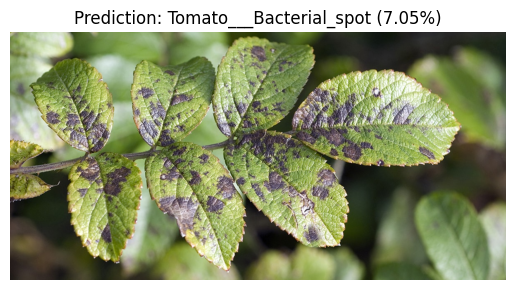

In [ ]:
import tensorflow as tf # Import tensorflow
from tensorflow.keras.preprocessing import image # Import image from keras.preprocessing
import numpy as np # Import numpy
import matplotlib.pyplot as plt # Import matplotlib
from google.colab import files # Import files from google.colab

reloaded_model = tf.keras.models.load_model("/content/plant_disease_recognition_model.keras")


predict_uploaded_image(reloaded_model, class_names)

Saving leaf01.jpg to leaf01.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


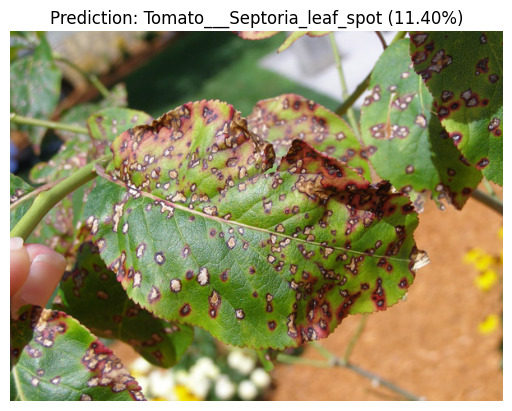

In [ ]:
import tensorflow as tf # Import tensorflow
from tensorflow.keras.preprocessing import image # Import image from keras.preprocessing
import numpy as np # Import numpy
import matplotlib.pyplot as plt # Import matplotlib
from google.colab import files # Import files from google.colab

reloaded_model = tf.keras.models.load_model("/content/plant_disease_recognition_model.keras")


predict_uploaded_image(reloaded_model, class_names)